In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [68]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [27]:
df.isnull

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

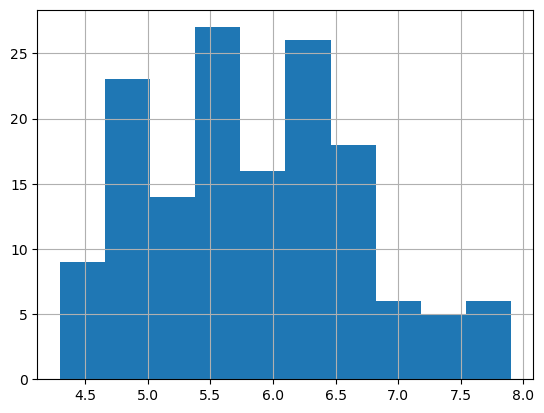

In [29]:
df['SepalLengthCm'].hist()

<Axes: >

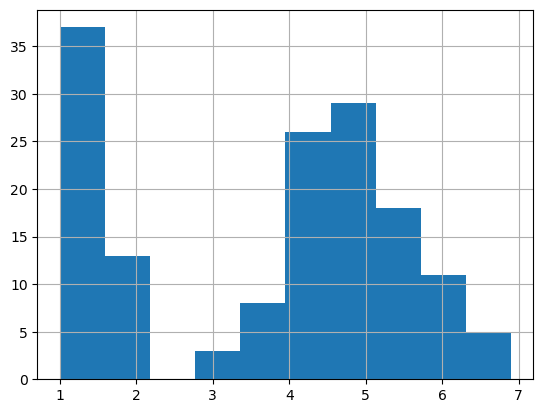

In [30]:
df['PetalLengthCm'].hist()

<Axes: >

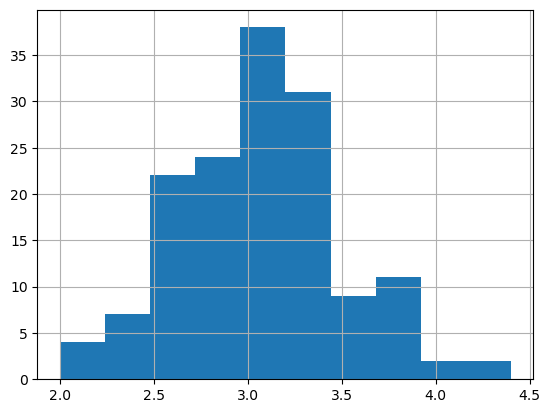

In [31]:
df['SepalWidthCm'].hist()

<Axes: >

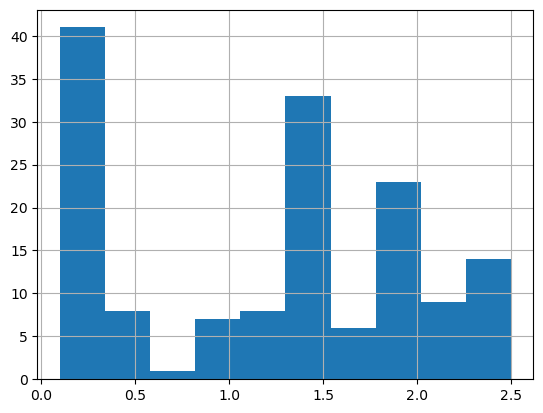

In [32]:
df['PetalWidthCm'].hist()

In [33]:
colors=['red','orange','blue']
species=['Iris-setosa ' ,'Iris-versicolor','Iris-virginica']

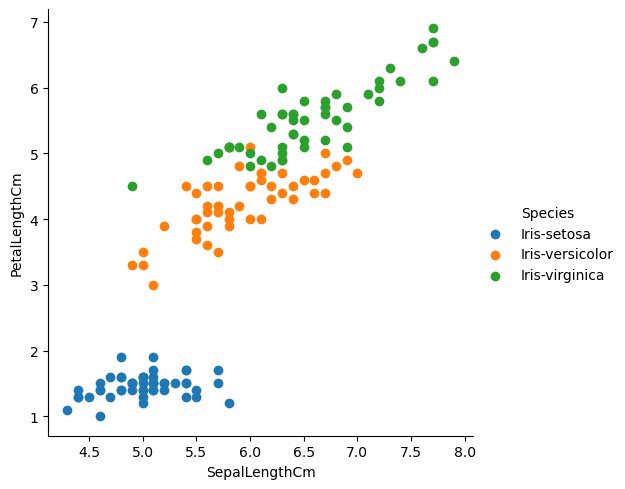

In [75]:
sns.FacetGrid(df,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()

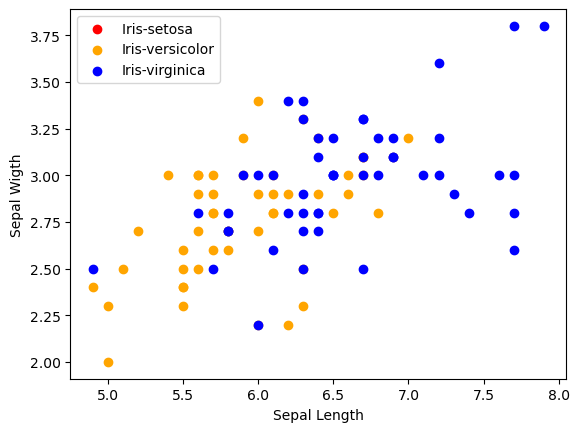

In [38]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Wigth")
plt.legend()
    

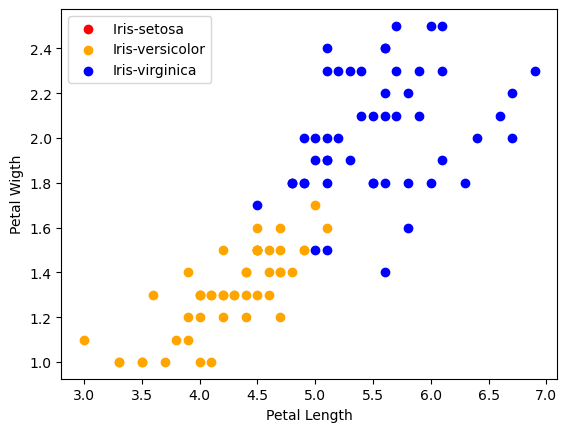

In [39]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Wigth")
plt.legend()

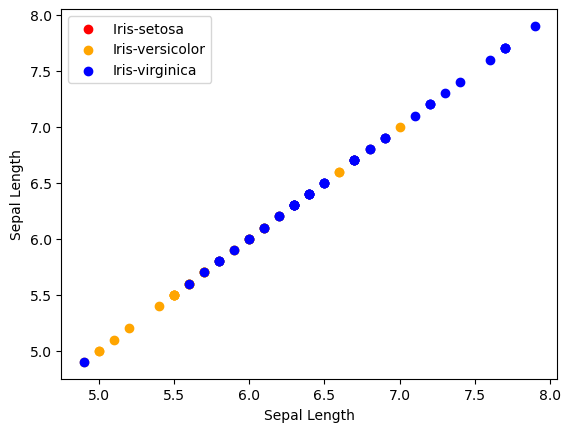

In [40]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("PetalLength")
plt.legend()
    

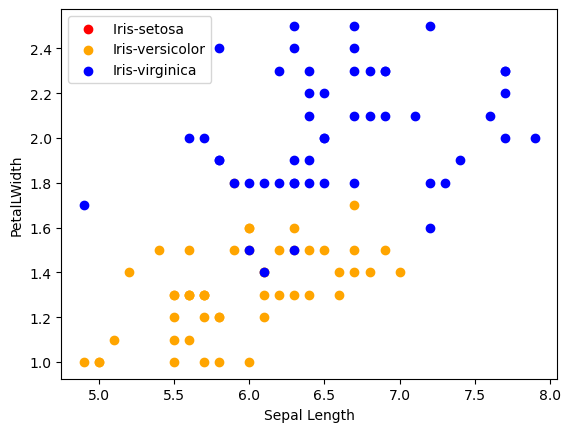

In [41]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'],c = colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("PetalLWidth")
plt.legend()
    

In [76]:
x=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=df[["Species"]].values

In [77]:
Model = LogisticRegression()
Model.fit(x,y)

D:\jupanno\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [78]:
Model.score(x,y).round(2)

0.97

In [79]:
Actual = y
predicted = Model.predict(x)

In [82]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [83]:
print(metrics.confusion_matrix(Actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [85]:
predicted = Model.predict([[5.1,3.5,1.4,0.2]])
predicted

array(['Iris-setosa'], dtype=object)